In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

sns.set()
pd.set_option('max_column', None)
pd.set_option('max_row', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_aWnotuB.csv', parse_dates=['DateTime'], index_col='DateTime')
test = pd.read_csv('test_BdBKkAj_L87Nc3S.csv', parse_dates=['DateTime'], index_col='DateTime')
sample = pd.read_csv('sample_submission_KVKNmI7.csv')

train.shape, test.shape

((48120, 3), (11808, 2))

In [3]:
train.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [4]:
train['Junction'].value_counts()

3    14592
2    14592
1    14592
4     4344
Name: Junction, dtype: int64

In [5]:
tr = train.reset_index()
te = test.reset_index()

tr.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [6]:
df = pd.concat([tr, te], ignore_index=True)
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [9]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Quarter'] = df['DateTime'].dt.quarter
df['Hour'] = df['DateTime'].dt.hour
df['WeekDay'] = df['DateTime'].dt.week

In [10]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Day,DayOfWeek,Quarter,Hour,WeekDay
0,2015-11-01 00:00:00,1,15.0,20151101001,2015,11,1,6,4,0,44
1,2015-11-01 01:00:00,1,13.0,20151101011,2015,11,1,6,4,1,44
2,2015-11-01 02:00:00,1,10.0,20151101021,2015,11,1,6,4,2,44
3,2015-11-01 03:00:00,1,7.0,20151101031,2015,11,1,6,4,3,44
4,2015-11-01 04:00:00,1,9.0,20151101041,2015,11,1,6,4,4,44


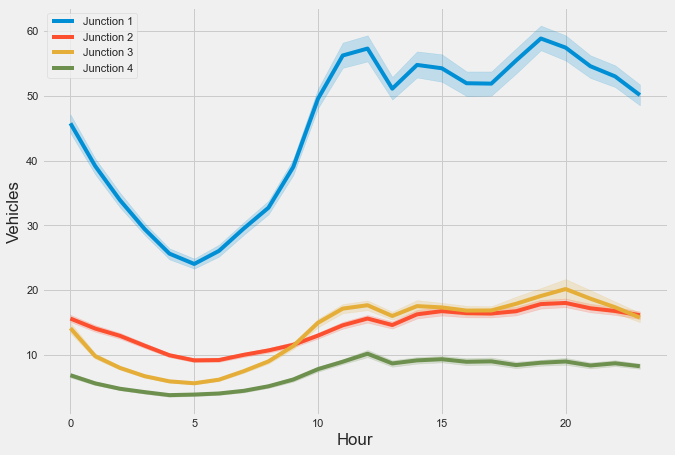

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
sns.lineplot(x='Hour', y='Vehicles', data=df[df['Junction'] == 1], label='Junction 1')
sns.lineplot(x='Hour', y='Vehicles', data=df[df['Junction'] == 2], label='Junction 2')
sns.lineplot(x='Hour', y='Vehicles', data=df[df['Junction'] == 3], label='Junction 3')
sns.lineplot(x='Hour', y='Vehicles', data=df[df['Junction'] == 4], label='Junction 4')
plt.legend(loc='best')
plt.title('Vehicles per Hour along the 4 Junction', size=20)

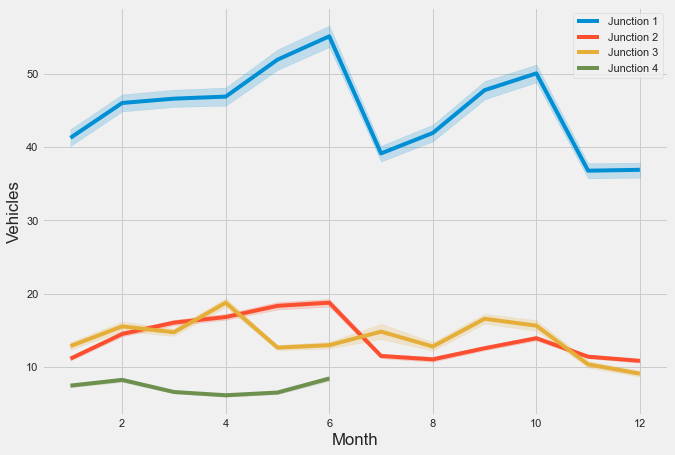

In [15]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Month', y='Vehicles', data=df[df['Junction'] == 1], label='Junction 1')
sns.lineplot(x='Month', y='Vehicles', data=df[df['Junction'] == 2], label='Junction 2')
sns.lineplot(x='Month', y='Vehicles', data=df[df['Junction'] == 3], label='Junction 3')
sns.lineplot(x='Month', y='Vehicles', data=df[df['Junction'] == 4], label='Junction 4')
plt.legend(loc='best')
plt.title('Vehicles per Month along the 4 Junction', size=20)

Text(0.5, 1.0, 'Vehicles per Month along the 4 Junction')

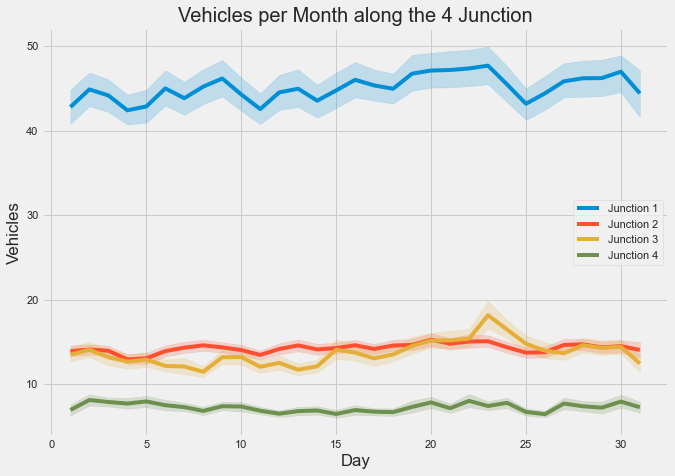

In [16]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Day', y='Vehicles', data=df[df['Junction'] == 1], label='Junction 1')
sns.lineplot(x='Day', y='Vehicles', data=df[df['Junction'] == 2], label='Junction 2')
sns.lineplot(x='Day', y='Vehicles', data=df[df['Junction'] == 3], label='Junction 3')
sns.lineplot(x='Day', y='Vehicles', data=df[df['Junction'] == 4], label='Junction 4')
plt.legend(loc='best')
plt.title('Vehicles per Month along the 4 Junction', size=20)

In [17]:
df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID', 'Year', 'Month', 'Day',
       'DayOfWeek', 'Quarter', 'Hour', 'WeekDay'],
      dtype='object')

([<matplotlib.axis.YTick at 0x2a024c0cb48>,
 <a list of 6 Text major ticklabel objects>)

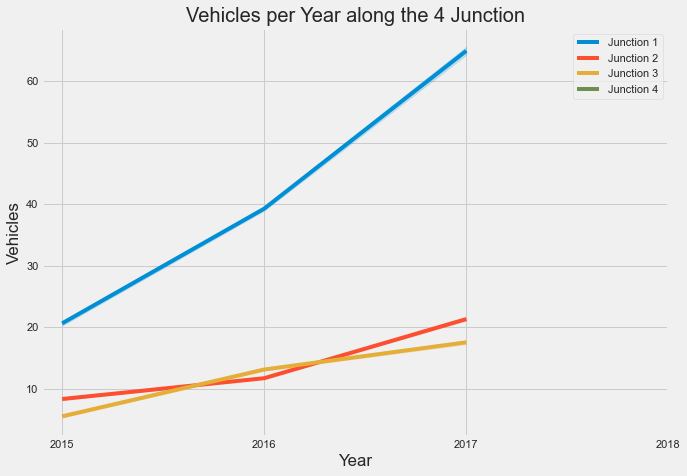

In [21]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y='Vehicles', data=df[df['Junction'] == 1], label='Junction 1')
sns.lineplot(x='Year', y='Vehicles', data=df[df['Junction'] == 2], label='Junction 2')
sns.lineplot(x='Year', y='Vehicles', data=df[df['Junction'] == 3], label='Junction 3')
sns.lineplot(x='Year', y='Vehicles', data=df[df['Junction'] == 4], label='Junction 4')
plt.legend(loc='best')
plt.title('Vehicles per Year along the 4 Junction', size=20)
plt.xticks(np.arange(2015, 2019, 1))
plt.yticks(np.arange(10, 70, 10))

In [23]:
df['Quarter'].value_counts()

3    15456
2    15288
1    15192
4    13992
Name: Quarter, dtype: int64

In [35]:
# which day has the highest number of vehicles and on which junction and which Month?
# tr[tr['Vehicles']== tr['Vehicles'].max(), True]
df[df['Vehicles'] == df['Vehicles'].max()][['Day', 'Month', 'Junction']]


,Day,Month,Junction
40723,23,2,3


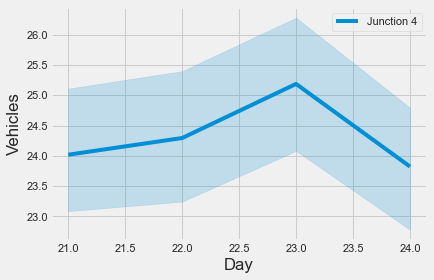

In [39]:
sns.lineplot(x='Day', y='Vehicles', data=df[(df['Day'] > 20) & (df['Day'] <= 24)], label='Junction 4')


In [40]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Day,DayOfWeek,Quarter,Hour,WeekDay
0,2015-11-01 00:00:00,1,15.0,20151101001,2015,11,1,6,4,0,44
1,2015-11-01 01:00:00,1,13.0,20151101011,2015,11,1,6,4,1,44
2,2015-11-01 02:00:00,1,10.0,20151101021,2015,11,1,6,4,2,44
3,2015-11-01 03:00:00,1,7.0,20151101031,2015,11,1,6,4,3,44
4,2015-11-01 04:00:00,1,9.0,20151101041,2015,11,1,6,4,4,44


In [42]:
del df['DateTime'], df['ID']
ID = te['ID']

In [107]:
df_dum = pd.get_dummies(data=df, columns=['Year', 'Month', 'Hour', 'WeekDay', 'DayOfWeek', 
                                          'Quarter', 'Day'], drop_first=True, sparse=True)
df_dum.columns

Index(['Junction', 'Vehicles', 'Year_2016', 'Year_2017', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7',
       ...
       'Day_22', 'Day_23', 'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28',
       'Day_29', 'Day_30', 'Day_31'],
      dtype='object', length=129)

In [108]:
features = [a for a in df_dum.columns if a not in ['Vehicles']]
features

['Junction',
 'Year_2016',
 'Year_2017',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23',
 'WeekDay_2',
 'WeekDay_3',
 'WeekDay_4',
 'WeekDay_5',
 'WeekDay_6',
 'WeekDay_7',
 'WeekDay_8',
 'WeekDay_9',
 'WeekDay_10',
 'WeekDay_11',
 'WeekDay_12',
 'WeekDay_13',
 'WeekDay_14',
 'WeekDay_15',
 'WeekDay_16',
 'WeekDay_17',
 'WeekDay_18',
 'WeekDay_19',
 'WeekDay_20',
 'WeekDay_21',
 'WeekDay_22',
 'WeekDay_23',
 'WeekDay_24',
 'WeekDay_25',
 'WeekDay_26',
 'WeekDay_27',
 'WeekDay_28',
 'WeekDay_29',
 'WeekDay_30',
 'WeekDay_31',
 'WeekDay_32',
 'WeekDay_33',
 'WeekDay_34',
 'WeekDay_35',
 'WeekDay_36',
 'WeekDay_37',
 'WeekDay_38',
 'WeekDay_

In [109]:
train_features = df_dum[df_dum['Vehicles'].notnull() == True]
test_features = df_dum[df_dum['Vehicles'].notnull() == False]

In [110]:
X = train_features[features]
y = train_features['Vehicles']


In [111]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=2010)

In [112]:
test_features.drop('Vehicles', axis=1, inplace=True)

In [53]:
def rmse(y_true, y_pred):
    return(np.sqrt(mean_squared_error(y_true, y_pred)))

In [113]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
y_pred = lr.predict(X_valid)
print('RMSE: {}'.format(rmse(y_valid, y_pred)))

RMSE: 12.420012135080023


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
grb = GradientBoostingRegressor(learning_rate=0.01, n_estimators=600, max_depth=7)
grb.fit(X_train, y_train)

In [105]:
grb_pred = grb.predict(X_valid)
print('RMSE: {}'.format(rmse(y_valid, grb_pred)))

RMSE: 6.609076452856526


In [66]:
rf = RandomForestRegressor(n_estimators=400, max_depth=5)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [67]:
rf_pred = rf.predict(X_valid)
print('RMSE: {}'.format(rmse(y_valid, rf_pred)))

RMSE: 10.298240021566123


In [72]:
grb.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=600,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [106]:
from xgboost.sklearn import XGBRegressor
import math
# xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
#              importance_type='gain', learning_rate=0.05, max_delta_step=0,
#              max_depth=2, min_child_weight=0, missing=None, n_estimators=1000,
#              n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
#              reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
#              silent=None, subsample=1, verbosity=1)

xgb = XGBRegressor(n_estimators=4000, max_depth=12)
xgmod=xgb.fit(X_train, y_train, early_stopping_rounds=10, verbose=50,
              eval_set=[(X_train, y_train),(X_valid, y_valid)])
xg_pred = xgmod.predict(X_valid)
print("Root Mean Absolute Error : " + str(np.sqrt(mean_squared_error(xg_pred, y_valid))))

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Year_2016, Year_2017, Month_2, Month_3, Month_4, Month_5, Month_6, Month_7, Month_8, Month_9, Month_10, Month_11, Month_12, Hour_1, Hour_2, Hour_3, Hour_4, Hour_5, Hour_6, Hour_7, Hour_8, Hour_9, Hour_10, Hour_11, Hour_12, Hour_13, Hour_14, Hour_15, Hour_16, Hour_17, Hour_18, Hour_19, Hour_20, Hour_21, Hour_22, Hour_23, Junction_2, Junction_3, Junction_4, DayOfWeek_1, DayOfWeek_2, DayOfWeek_3, DayOfWeek_4, DayOfWeek_5, DayOfWeek_6, Quarter_2, Quarter_3, Quarter_4

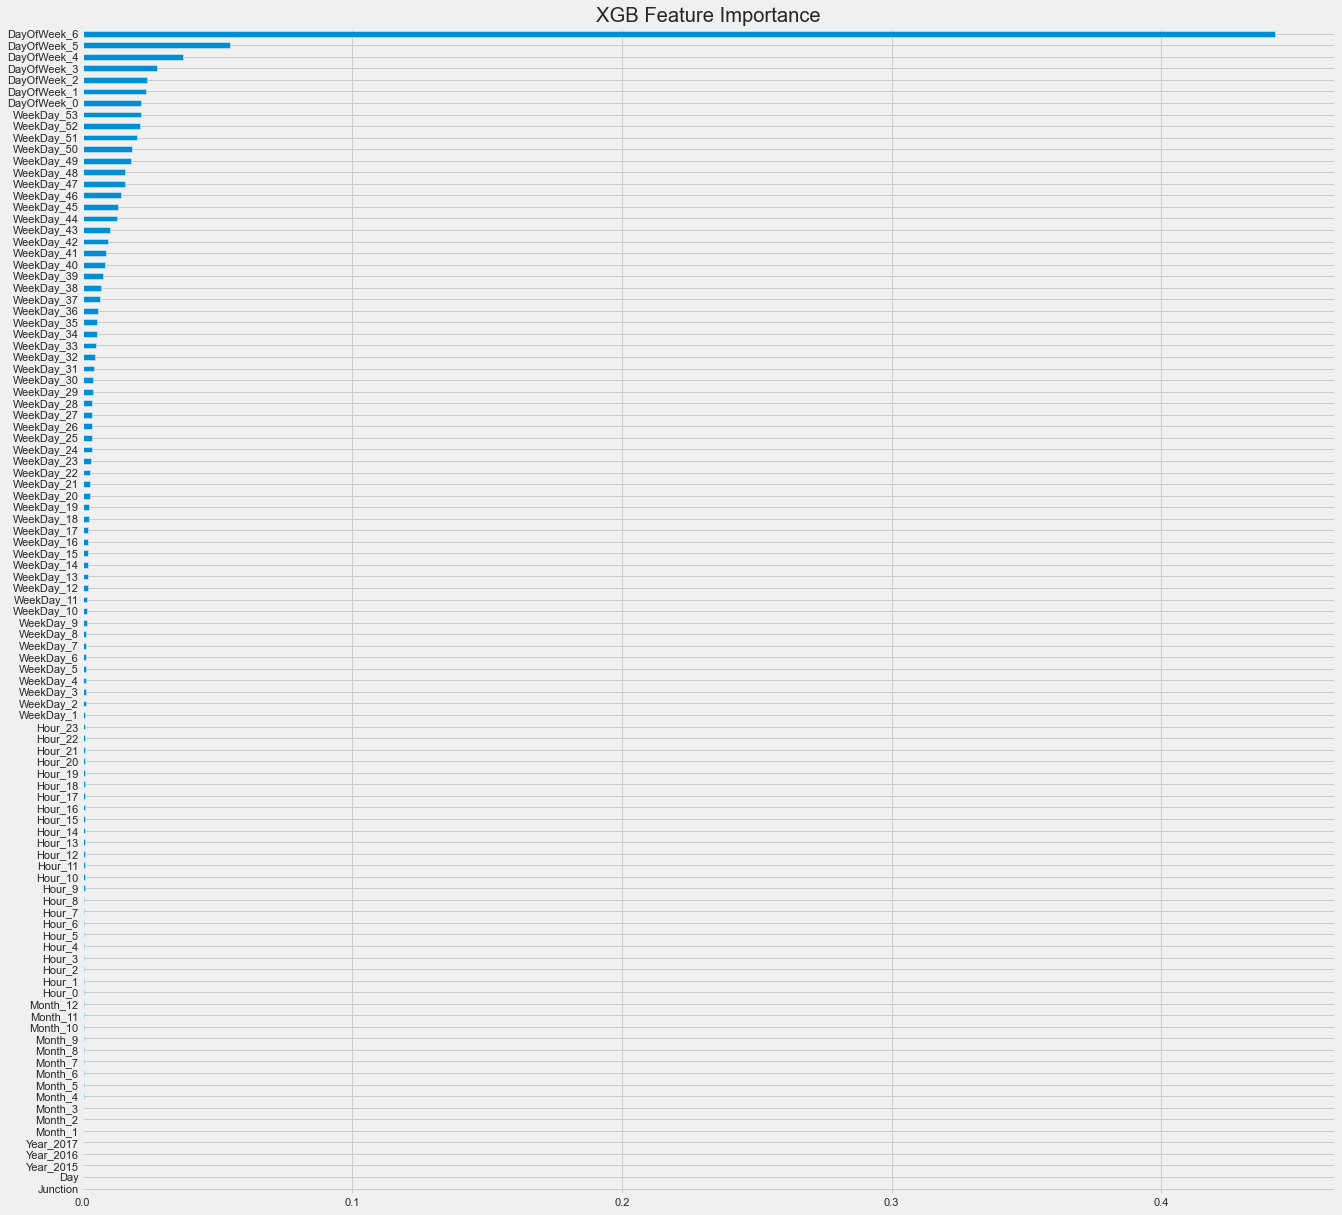

In [95]:
fea_imp = pd.Series(sorted(xgmod.feature_importances_), index=X.columns)
fea_imp.plot(kind='barh', figsize=(20,20), title='XGB Feature Importance')

In [73]:
sample['ID'] = ID
sample['Vehicles'] = grb.predict(test_features)

In [74]:
sample.to_csv('sub_grb1.csv', index=False)
print('file Ready for Submission')

file Ready for Submission


In [6]:
ID = test['ID']
del train['ID'], test['ID']

In [7]:
train.head()

,Junction,Vehicles
DateTime,,
2015-11-01 00:00:00,1,15
2015-11-01 01:00:00,1,13
2015-11-01 02:00:00,1,10
2015-11-01 03:00:00,1,7
2015-11-01 04:00:00,1,9


In [10]:
train.loc[
    ('2015-11-01 04:00:00')
]

,Junction,Vehicles
DateTime,,
2015-11-01 04:00:00,1,9
2015-11-01 04:00:00,2,7
2015-11-01 04:00:00,3,2


In [11]:
junction_data = train['Junction']
tm_data = train[['Vehicles']]

tm_data.columns

Index(['Vehicles'], dtype='object')

In [12]:
tm_data.describe()

,Vehicles
count,48120.000000
mean,22.791334
std,20.750063
min,1.000000
25%,9.000000
50%,15.000000
75%,29.000000
max,180.000000


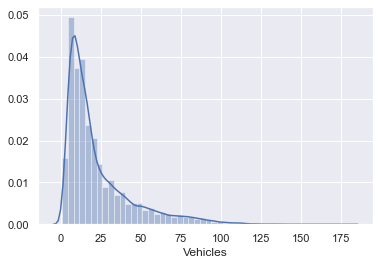

In [16]:
sns.distplot(tm_data['Vehicles'], kde=True, hist=True, rug=False)

In [20]:
from sklearn.preprocessing import PowerTransformer
pow_trans = PowerTransformer()
un_skewed_Vehicle = pow_trans.fit_transform(tm_data)

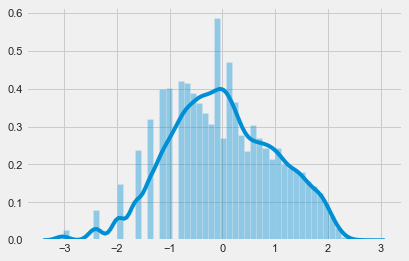

In [22]:
plt.style.use('fivethirtyeight')
sns.distplot(un_skewed_Vehicle, kde=True, hist=True, rug=False)

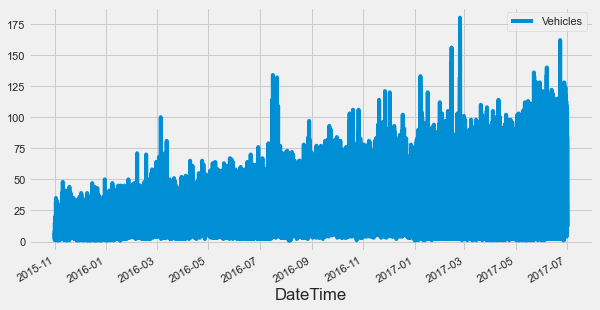

In [23]:
tm_data.plot(figsize=(9, 5))

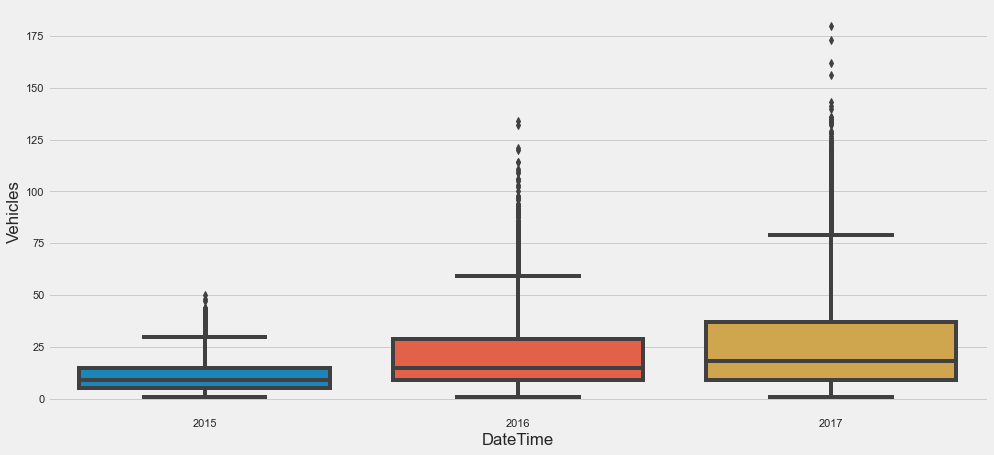

In [25]:
# Vehicle Year
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(tm_data.Vehicles.index.year, tm_data.Vehicles, ax=ax)
plt.title('Vehicle Population on Road based on year')